#ASSIGNMENT 02

**Outcome:**
* Time series Analysis
* Data Combination and Merging Techniques
* Data reading Techniques

In [1]:
#Import all libraries here
import pandas as pd
import matplotlib.pyplot as plt


## Task 01
Write a loop to concatenate (vertically) each of the files in **csvFiles.zip** to form one big file. Call this big file as ‘full_data’.




In [2]:
f_name_list = []
for i in range(1992,2011):
    f_name_list.append("csvFiles/yob" + str(i) + ".csv")
    
# print(f_name_list)
count = 0
combined = pd.read_csv('csvFiles/yob1991.csv')
for f_name in f_name_list:
    data = pd.read_csv(f_name)
    combined = combined.append(data, ignore_index = True)
# print(combined.tail())
combined.to_csv('full_data.csv')
print('Files Combined, & Written')
print(combined.info())

Files Combined, & Written
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596931 entries, 0 to 596930
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    596931 non-null  object
 1   sex     596931 non-null  object
 2   births  596931 non-null  int64 
 3   year    596931 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 18.2+ MB
None


##Task 02

A link [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) contains sets of Covid-19 data of confirmed, deaths and recovered cases. Your first job as a Data Analyst is to read the data from the gitub page and upload it to 3 respective dataframes.
* confirmed_global_cases
* death _global_case
* recovered_global_cases

Make sure you read the files without downloading the data from the repo.

In [3]:
conf_glob_cas = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_glob_cas = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recov_glob_cas = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
print('Data Loading Done.')

Data Loading Done.


##Task 03

Using the 3 dataframes you stored previously, preforemd the following tasks.
1. Drop the LAT, Province and LONG column
2. Group each Dataframe based on Country
3. And transpose the DF

Your data should look like this

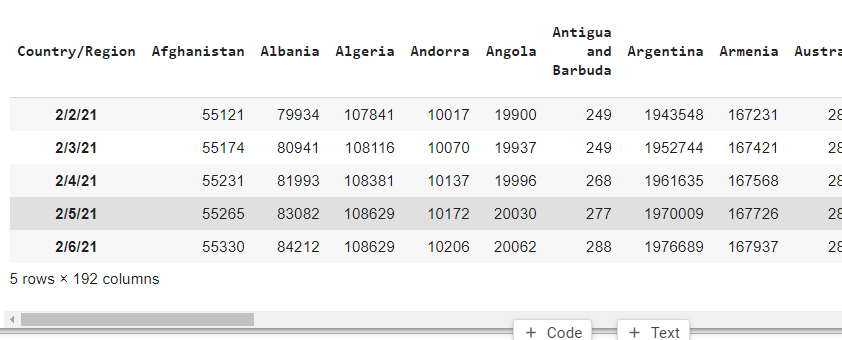

In [4]:
conf_glob_cas = conf_glob_cas.drop(columns=['Province/State', 'Lat','Long'])
death_glob_cas = death_glob_cas.drop(columns=['Province/State', 'Lat','Long'])
recov_glob_cas = recov_glob_cas.drop(columns=['Province/State', 'Lat','Long'])
print('Dropping Columns Done')

Dropping Columns Done


In [5]:
conf_glob = conf_glob_cas.groupby('Country/Region').agg('sum')
death_glob = death_glob_cas.groupby('Country/Region').agg('sum')
recov_glob = recov_glob_cas.groupby('Country/Region').agg('sum')
print('Grouping by Country Done.')

Grouping by Country Done.


In [6]:
T_conf_glob = conf_glob.T
T_death_glob = death_glob.T
T_recov_glob = recov_glob.T
print('Transpose Done.')

Transpose Done.


In [7]:
#checking for confirmation
T_conf_glob.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2/12/21,55445,90835,110303,10427,20294,419,2015496,168830,28892,430870,...,4025574,47828,79340,1,132259,2142,166200,2136,67681,35045
2/13/21,55473,91987,110513,10463,20329,427,2021553,169022,28898,432303,...,4038929,48459,79381,1,132743,2195,166800,2136,68454,35104
2/14/21,55492,93075,110711,10503,20366,427,2025798,169167,28900,433487,...,4049920,48909,79416,1,133218,2228,167604,2145,69437,35172
2/15/21,55514,93850,110894,10538,20381,443,2029057,169255,28905,434712,...,4059696,49360,79442,1,133577,2269,168444,2145,70248,35222
2/16/21,55518,94651,111069,10555,20389,443,2033060,169391,28911,436139,...,4070332,49725,79461,1,133927,2311,169487,2148,70823,35315


##Task 04
Now we need to merge the dataframes. One way to achieve this is suggested below, but you are free to explore your own methods.
1. Add a column named "Status" to your each dataframe containing **confirmed, death,** and **recovered** for confirmed_global_cases, death _global_case, recovered_global_cases respectively.
2. Converet your Date column to DateTimeIndex
3. Use a suitable merge to join the 3 data frames.

In [8]:
T_conf_glob['status'] = 'confirm'
T_death_glob['status'] = 'death'
T_recov_glob['status'] = 'recovered'

In [9]:
dtidx_conf = pd.DatetimeIndex(pd.to_datetime(T_conf_glob.index).values, name = 'Date_Index')
T_conf_glob = T_conf_glob.set_index(dtidx_conf)

dtidx_death = pd.DatetimeIndex(pd.to_datetime(T_death_glob.index).values, name = 'Date_Index')
T_death_glob = T_death_glob.set_index(dtidx_death)


dtidx_recov = pd.DatetimeIndex(pd.to_datetime(T_recov_glob.index).values, name = 'Date_Index')
T_recov_glob = T_recov_glob.set_index(dtidx_recov)

In [10]:
conf_df = T_conf_glob.iloc[386:]
death_df = T_death_glob.iloc[386:]
recov_df = T_recov_glob.iloc[386:]

In [11]:
conf_df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,status
Date_Index,,,,,,,,,,,,,,,,,,,,,
2021-02-11,55420,89776,110049,10391,20261,381,2008345,168676,28887,429139,...,47254,79303,1,131828,2140,165535,2134,66598,34864,confirm
2021-02-12,55445,90835,110303,10427,20294,419,2015496,168830,28892,430870,...,47828,79340,1,132259,2142,166200,2136,67681,35045,confirm
2021-02-13,55473,91987,110513,10463,20329,427,2021553,169022,28898,432303,...,48459,79381,1,132743,2195,166800,2136,68454,35104,confirm
2021-02-14,55492,93075,110711,10503,20366,427,2025798,169167,28900,433487,...,48909,79416,1,133218,2228,167604,2145,69437,35172,confirm
2021-02-15,55514,93850,110894,10538,20381,443,2029057,169255,28905,434712,...,49360,79442,1,133577,2269,168444,2145,70248,35222,confirm
2021-02-16,55518,94651,111069,10555,20389,443,2033060,169391,28911,436139,...,49725,79461,1,133927,2311,169487,2148,70823,35315,confirm


In [12]:
death_df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,status
Date_Index,,,,,,,,,,,,,,,,,,,,,
2021-02-11,2419,1517,2930,106,487,9,49874,3135,909,8138,...,524,622,0,1260,35,1910,616,914,1364,death
2021-02-12,2424,1531,2932,106,490,9,50029,3138,909,8170,...,527,622,0,1267,35,1918,616,931,1393,death
2021-02-13,2427,1543,2935,107,491,9,50188,3140,909,8195,...,533,622,0,1273,35,1930,616,940,1398,death
2021-02-14,2427,1555,2939,107,492,9,50236,3141,909,8211,...,535,622,0,1279,35,1933,617,951,1400,death
2021-02-15,2427,1567,2943,107,493,9,50327,3147,909,8221,...,541,622,0,1285,35,1936,617,959,1410,death
2021-02-16,2428,1582,2945,107,494,9,50432,3150,909,8260,...,546,622,0,1292,35,1942,618,974,1414,death


In [13]:
# merged_data = pd.merge(conf_df,death_df, on='status', how='outer')
append_data = conf_df.append(recov_df)
combined_data = append_data.append(death_df)
combined_data

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,status
Date_Index,,,,,,,,,,,,,,,,,,,,,
2021-02-11,55420,89776,110049,10391,20261,381,2008345,168676,28887,429139,...,47254,79303,1,131828,2140,165535,2134,66598,34864,confirm
2021-02-12,55445,90835,110303,10427,20294,419,2015496,168830,28892,430870,...,47828,79340,1,132259,2142,166200,2136,67681,35045,confirm
2021-02-13,55473,91987,110513,10463,20329,427,2021553,169022,28898,432303,...,48459,79381,1,132743,2195,166800,2136,68454,35104,confirm
2021-02-14,55492,93075,110711,10503,20366,427,2025798,169167,28900,433487,...,48909,79416,1,133218,2228,167604,2145,69437,35172,confirm
2021-02-15,55514,93850,110894,10538,20381,443,2029057,169255,28905,434712,...,49360,79442,1,133577,2269,168444,2145,70248,35222,confirm
2021-02-16,55518,94651,111069,10555,20389,443,2033060,169391,28911,436139,...,49725,79461,1,133927,2311,169487,2148,70823,35315,confirm
2021-02-11,48279,54362,75436,9781,18710,197,1806260,160670,26112,407155,...,41426,77726,1,123811,1528,154727,1428,59989,29471,recovered
2021-02-12,48390,55243,75628,9833,18786,199,1814160,160838,26116,408426,...,41966,77780,1,124253,1529,155362,1430,61302,29959,recovered
2021-02-13,48392,55983,75816,9868,18790,199,1820965,160942,26120,409877,...,42505,77890,1,124734,1529,155950,1430,62575,30089,recovered


In [14]:
mylist = []
#picking columns as list
mylist = list(combined_data.columns)

#shifting/re-arranging 'status' to start
temp = mylist.pop()
mylist.insert(0,temp)

In [15]:
#making new dataframe with updated list of columns
final_data = combined_data[mylist]

In [16]:
#re-arranging data with the help of sort_index()
final_data= final_data.sort_index()

In [76]:
final_data
# final_data[['status','Pakistan']]

Country/Region,status,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date_Index,,,,,,,,,,,,,,,,,,,,,
2021-02-11,confirm,55420,89776,110049,10391,20261,381,2008345,168676,28887,...,4010376,47254,79303,1,131828,2140,165535,2134,66598,34864
2021-02-11,death,2419,1517,2930,106,487,9,49874,3135,909,...,115748,524,622,0,1260,35,1910,616,914,1364
2021-02-11,recovered,48279,54362,75436,9781,18710,197,1806260,160670,26112,...,10598,41426,77726,1,123811,1528,154727,1428,59989,29471
2021-02-12,confirm,55445,90835,110303,10427,20294,419,2015496,168830,28892,...,4025574,47828,79340,1,132259,2142,166200,2136,67681,35045
2021-02-12,death,2424,1531,2932,106,490,9,50029,3138,909,...,116507,527,622,0,1267,35,1918,616,931,1393
2021-02-12,recovered,48390,55243,75628,9833,18786,199,1814160,160838,26116,...,10655,41966,77780,1,124253,1529,155362,1430,61302,29959
2021-02-13,death,2427,1543,2935,107,491,9,50188,3140,909,...,117128,533,622,0,1273,35,1930,616,940,1398
2021-02-13,recovered,48392,55983,75816,9868,18790,199,1820965,160942,26120,...,10850,42505,77890,1,124734,1529,155950,1430,62575,30089
2021-02-13,confirm,55473,91987,110513,10463,20329,427,2021553,169022,28898,...,4038929,48459,79381,1,132743,2195,166800,2136,68454,35104


In [29]:
final_data.groupby(['Date_Index','status']).max()

Country/Region        Afghanistan  Albania  Algeria  Andorra  Angola  \
Date_Index status                                                      
2021-02-11 confirm          55420    89776   110049    10391   20261   
           death             2419     1517     2930      106     487   
           recovered        48279    54362    75436     9781   18710   
2021-02-12 confirm          55445    90835   110303    10427   20294   
           death             2424     1531     2932      106     490   
           recovered        48390    55243    75628     9833   18786   
2021-02-13 confirm          55473    91987   110513    10463   20329   
           death             2427     1543     2935      107     491   
           recovered        48392    55983    75816     9868   18790   
2021-02-14 confirm          55492    93075   110711    10503   20366   
           death             2427     1555     2939      107     492   
           recovered        48395    56764    75999     9911   18795   
2021-02-15 confirm          55514    93850   110894    10538   20381   
           death             2427     1567     2943      107     493   
           recovered        48433    57736    76168     9965   18884   
2021-02-16 confirm          55518    94651   111069    10555   20389   
           death             2428     1582     2945      107     494   
           recovered        48514    58794    76330    10022   18929   

Country/Region        Antigua and Barbuda  Argentina  Armenia  Australia  \
Date_Index status                                                          
2021-02-11 confirm                    381    2008345   168676      28887   
           death                        9      49874     3135        909   
           recovered                  197    1806260   160670      26112   
2021-02-12 confirm                    419    2015496   168830      28892   
           death                        9      50029     3138        909   
           recovered                  199    1814160   160838      26116   
2021-02-13 confirm                    427    2021553   169022      28898   
           death                        9      50188     3140        909   
           recovered                  199    1820965   160942      26120   
2021-02-14 confirm                    427    2025798   169167      28900   
           death                        9      50236     3141        909   
           recovered                  199    1827118   161015      26126   
2021-02-15 confirm                    443    2029057   169255      28905   
           death                        9      50327     3147        909   
           recovered                  205    1833442   161105      26128   
2021-02-16 confirm                    443    2033060   169391      28911   
           death                        9      50432     3150        909   
           recovered                  205    1838291   161348      26133   

Country/Region        Austria  ...  United Kingdom  Uruguay  Uzbekistan  \
Date_Index status              ...                                        
2021-02-11 confirm     429139  ...         4010376    47254       79303   
           death         8138  ...          115748      524         622   
           recovered   407155  ...           10598    41426       77726   
2021-02-12 confirm     430870  ...         4025574    47828       79340   
           death         8170  ...          116507      527         622   
           recovered   408426  ...           10655    41966       77780   
2021-02-13 confirm     432303  ...         4038929    48459       79381   
           death         8195  ...          117128      533         622   
           recovered   409877  ...           10850    42505       77890   
2021-02-14 confirm     433487  ...         4049920    48909       79416   
           death         8211  ...          117387      535         622   
           recovered   411199  ...           10914    42889    

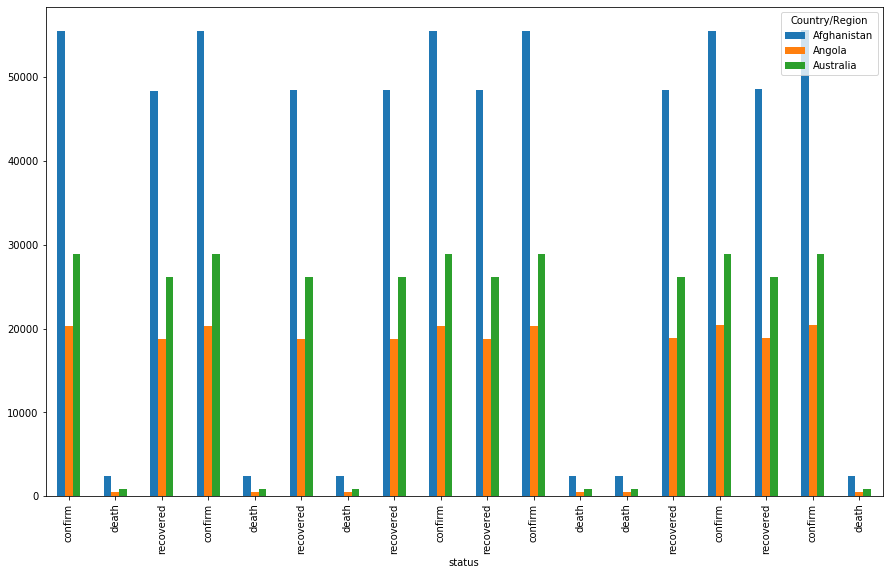

In [77]:
final_data.plot(x='status', y=['Afghanistan','Angola','Australia'], kind='bar')

plt.show()